In [1]:
import numpy as np
import pandas as pd
import SALibrary.SportsAnalytics as sa
import SALibrary.SimpleRatingSystem as srs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/f1_data_processed_2_imputed.csv')
df.head(5)

,RaceDate,Year,RaceName,FullName,DriverId,TeamName,TeamId,GridPosition,Position_Race,Podium_Finish,TotalLength,Time,Speed,Finished
0,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Lewis Hamilton,hamilton,Mercedes,mercedes,1,1,1,290455,5980.382,48.567968,1
1,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Sebastian Vettel,vettel,Ferrari,ferrari,3,2,1,290455,5982.963,48.547016,1
2,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Max Verstappen,max_verstappen,Red Bull Racing,red_bull,6,3,1,290455,5993.088,48.464998,1
3,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Daniel Ricciardo,ricciardo,Red Bull Racing,red_bull,5,4,0,290455,5995.761,48.443392,1
4,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Valtteri Bottas,bottas,Mercedes,mercedes,2,5,0,290455,6028.339,48.181597,1


In [4]:
df.isnull().sum()

RaceDate           0
Year               0
RaceName           0
FullName           0
DriverId           0
TeamName           0
TeamId             0
GridPosition       0
Position_Race      0
Podium_Finish      0
TotalLength        0
Time             248
Speed            248
Finished           0
dtype: int64

## Predict Speed using SRS model

Speed = constant + driver id + track id(racename) + team id + grid position + error

In [5]:
model_df = df.dropna()

In [6]:
target = model_df['Speed']
categorical_factors = model_df[['RaceName', 'DriverId', 'TeamId']]
float_factors = model_df[['GridPosition', 'TotalLength']]

# Train SRS model using SRS package
model_coeffs, RMSE = srs.srs_train(target, categorical_factors, float_factors)

print("\n*** Model Coefficients ***\n")
print(model_coeffs)
print("\nRMSE = {}".format(RMSE))


*** Model Coefficients ***

            type                   name     coeff
0       RaceName   Abu Dhabi Grand Prix -0.003333
1       RaceName  Australian Grand Prix  0.003256
2       RaceName    Austrian Grand Prix  0.007952
3       RaceName  Azerbaijan Grand Prix -0.009828
4       RaceName     Bahrain Grand Prix -0.013667
..           ...                    ...       ...
77        TeamId           aston_martin -0.001286
78        TeamId                 alpine -0.000812
79  GridPosition                numeric -0.065878
80   TotalLength                numeric  0.000179
81      constant                numeric -0.000869

[82 rows x 3 columns]

RMSE = 6.292949482278276


In [7]:
df.shape

(1360, 14)

In [8]:
# Create Prediction of Speed
srs.srs_predict(model_coeffs, df)

,RaceDate,Year,RaceName,FullName,DriverId,TeamName,TeamId,GridPosition,Position_Race,Podium_Finish,TotalLength,Time,Speed,Finished,prediction
0,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Lewis Hamilton,hamilton,Mercedes,mercedes,1,1,1,290455,5980.382000,48.567968,1,51.900969
1,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Sebastian Vettel,vettel,Ferrari,ferrari,3,2,1,290455,5982.963000,48.547016,1,51.768204
2,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Max Verstappen,max_verstappen,Red Bull Racing,red_bull,6,3,1,290455,5993.088000,48.464998,1,51.571504
3,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Daniel Ricciardo,ricciardo,Red Bull Racing,red_bull,5,4,0,290455,5995.761000,48.443392,1,51.635246
4,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Valtteri Bottas,bottas,Mercedes,mercedes,2,5,0,290455,6028.339000,48.181597,1,51.835675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,5/9/2021 13:00,2021,Spanish Grand Prix,Nicholas Latifi,latifi,Williams,williams,19,16,0,416856,5673.473182,73.474570,1,73.329051
1356,5/9/2021 13:00,2021,Spanish Grand Prix,Fernando Alonso,alonso,Alpine,alpine,10,17,0,416856,5673.473182,73.474570,1,73.922583
1357,5/9/2021 13:00,2021,Spanish Grand Prix,Mick Schumacher,mick_schumacher,Haas F1 Team,haas,18,18,0,416856,5759.266364,72.380052,1,73.393847
1358,5/9/2021 13:00,2021,Spanish Grand Prix,Nikita Mazepin,mazepin,Haas F1 Team,haas,20,19,0,416856,5759.266364,72.380052,1,73.262080


In [9]:
# Rename prediction column
df.rename(columns={'prediction': 'Speed_Predicted'}, inplace=True)

In [10]:
df.head(5)

,RaceDate,Year,RaceName,FullName,DriverId,TeamName,TeamId,GridPosition,Position_Race,Podium_Finish,TotalLength,Time,Speed,Finished,Speed_Predicted
0,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Lewis Hamilton,hamilton,Mercedes,mercedes,1,1,1,290455,5980.382,48.567968,1,51.900969
1,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Sebastian Vettel,vettel,Ferrari,ferrari,3,2,1,290455,5982.963,48.547016,1,51.768204
2,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Max Verstappen,max_verstappen,Red Bull Racing,red_bull,6,3,1,290455,5993.088,48.464998,1,51.571504
3,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Daniel Ricciardo,ricciardo,Red Bull Racing,red_bull,5,4,0,290455,5995.761,48.443392,1,51.635246
4,11/25/2018 13:10,2018,Abu Dhabi Grand Prix,Valtteri Bottas,bottas,Mercedes,mercedes,2,5,0,290455,6028.339,48.181597,1,51.835675


In [12]:
df[df['RaceName'] == 'Sakhir Grand Prix']

,RaceDate,Year,RaceName,FullName,DriverId,TeamName,TeamId,GridPosition,Position_Race,Podium_Finish,TotalLength,Time,Speed,Finished,Speed_Predicted
1120,12/6/2020 17:10,2020,Sakhir Grand Prix,Sergio Perez,perez,Racing Point,racing_point,5,1,1,470844,5475.114,85.997113,1,83.919406
1121,12/6/2020 17:10,2020,Sakhir Grand Prix,Esteban Ocon,ocon,Renault,renault,11,2,1,470844,5485.632,85.832225,1,83.521643
1122,12/6/2020 17:10,2020,Sakhir Grand Prix,Lance Stroll,stroll,Racing Point,racing_point,10,3,1,470844,5486.983,85.811091,1,83.589815
1123,12/6/2020 17:10,2020,Sakhir Grand Prix,Carlos Sainz,sainz,McLaren,mclaren,8,4,0,470844,5487.694,85.799974,1,83.715626
1124,12/6/2020 17:10,2020,Sakhir Grand Prix,Daniel Ricciardo,ricciardo,Renault,renault,7,5,0,470844,5488.444,85.788249,1,83.783539
1125,12/6/2020 17:10,2020,Sakhir Grand Prix,Alexander Albon,albon,Red Bull Racing,red_bull,12,6,0,470844,5488.956,85.780247,1,83.455434
1126,12/6/2020 17:10,2020,Sakhir Grand Prix,Daniil Kvyat,kvyat,AlphaTauri,alphatauri,6,7,0,470844,5489.648,85.769434,1,83.846356
1127,12/6/2020 17:10,2020,Sakhir Grand Prix,Valtteri Bottas,bottas,Mercedes,mercedes,1,8,0,470844,5490.503,85.756077,1,84.181808
1128,12/6/2020 17:10,2020,Sakhir Grand Prix,George Russell,russell,Mercedes,mercedes,2,9,0,470844,5493.670,85.706641,1,84.114354
1129,12/6/2020 17:10,2020,Sakhir Grand Prix,Lando Norris,norris,McLaren,mclaren,19,10,0,470844,5494.655,85.691276,1,82.990938


In [11]:
df.to_csv('./data/f1_data_speed_predicted.csv', sep=';', index=False)

## Podium Finish Prediction Without Speed

In [11]:
model_df = df[['DriverId', 'TeamId', 'RaceName', 'Year', 'GridPosition','Podium_Finish']]
model_df = pd.get_dummies(model_df, columns=['TeamId', 'DriverId', 'RaceName', 'Year'], drop_first=True)
# Define features and target
X = model_df.drop(columns=['Podium_Finish'])
y = model_df['Podium_Finish']

In [12]:
# Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Predict and Evaluate the Model
model_df['Logistic_Prediction'] = log_reg.predict(X)
model_df['Logistic_Probability'] = log_reg.predict_proba(X)[:, 1]

In [14]:
accuracy_log = accuracy_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
precision_log = precision_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
recall_log = recall_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
f1_log = f1_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
log_loss_log = log_loss(model_df['Podium_Finish'], model_df['Logistic_Probability'])

print(f"Logistic Regression Model Metrics:\nAccuracy: {accuracy_log}\nPrecision: {precision_log}\nRecall: {recall_log}\nF1 Score: {f1_log}\nLog Loss: {log_loss_log}")

Logistic Regression Model Metrics:
Accuracy: 0.913235294117647
Precision: 0.7107843137254902
Recall: 0.7107843137254902
F1 Score: 0.7107843137254902
Log Loss: 0.20815729757164805


In [15]:
print(classification_report(model_df['Podium_Finish'], model_df['Logistic_Prediction']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1156
           1       0.71      0.71      0.71       204

    accuracy                           0.91      1360
   macro avg       0.83      0.83      0.83      1360
weighted avg       0.91      0.91      0.91      1360



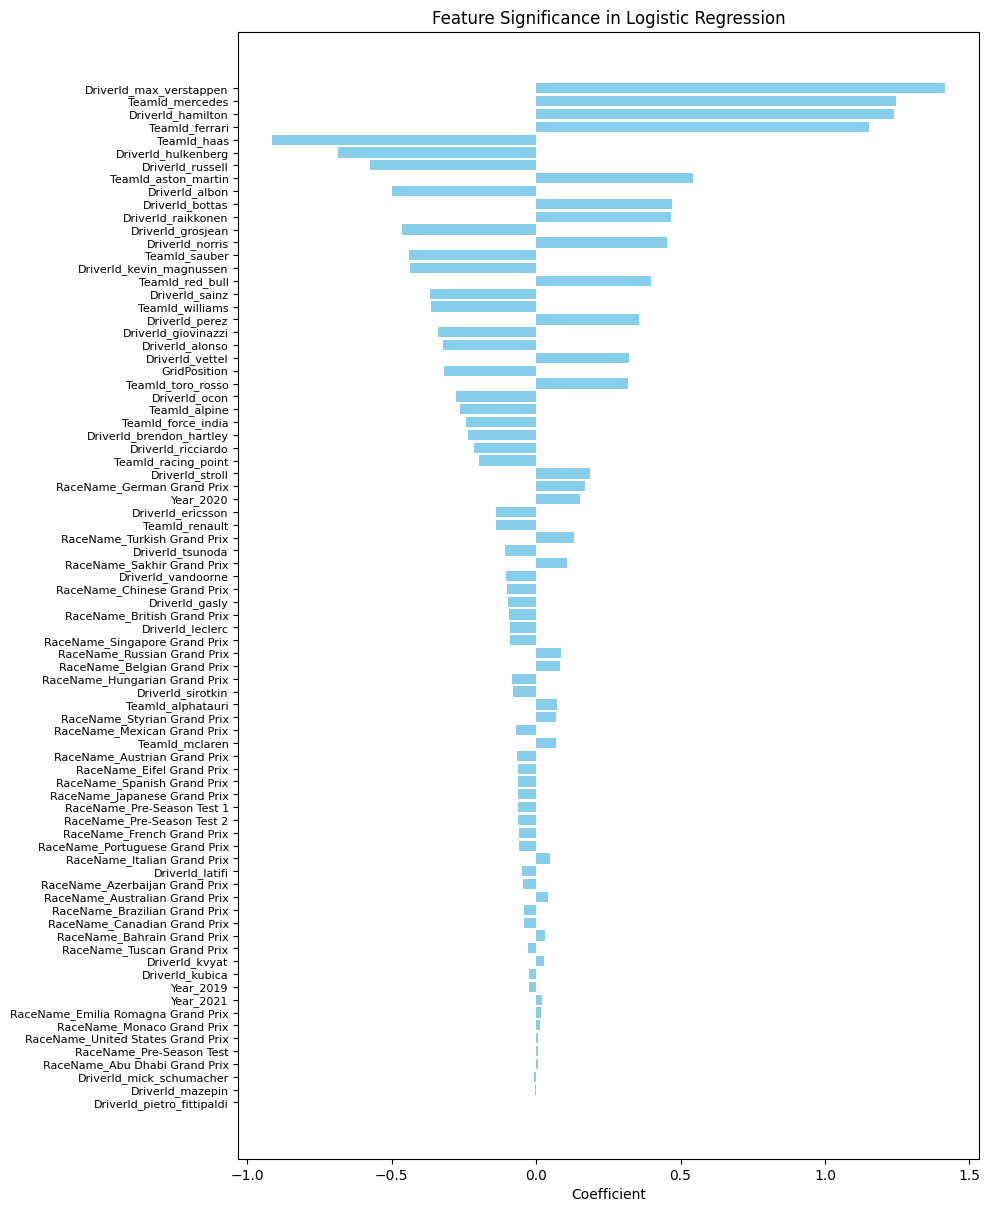

In [16]:
# Get the coefficients and feature names
coefficients = log_reg.coef_[0]
features = X.columns

# Create a DataFrame to store the coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 12))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.title('Feature Significance in Logistic Regression')
plt.gca().invert_yaxis()  # To have the most significant feature at the top
plt.show()

Coefficient for GridPosition: -0.3197075877379537


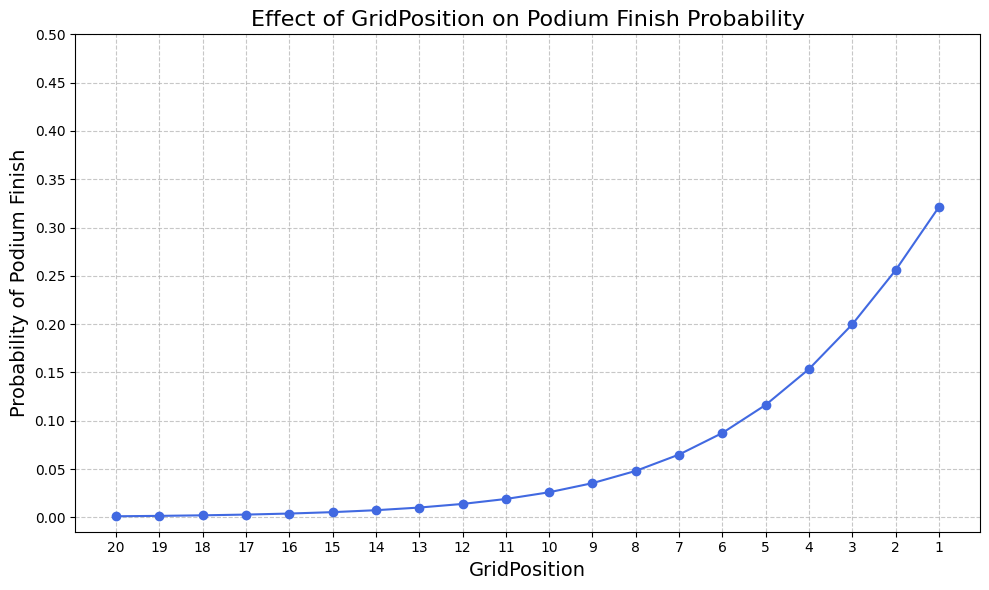

In [17]:
# Extract the coefficient for GridPosition
grid_position_coef = log_reg.coef_[0][X.columns.get_loc('GridPosition')]
print(f"Coefficient for GridPosition: {grid_position_coef}")

# Visualize the effect of GridPosition on the probability of a podium finish

grid_positions = np.arange(1, 21)
baseline_features = np.zeros(X.shape[1])
grid_position_probabilities = []

for grid_position in grid_positions:
    baseline_features[X.columns.get_loc('GridPosition')] = grid_position
    prob = log_reg.predict_proba([baseline_features])[0, 1]
    grid_position_probabilities.append(prob)

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(grid_positions, grid_position_probabilities, marker='o', linestyle='-', color='royalblue')
plt.title('Effect of GridPosition on Podium Finish Probability', fontsize=16)
plt.xlabel('GridPosition', fontsize=14)
plt.ylabel('Probability of Podium Finish', fontsize=14)

# Adjust x-axis to show integers only
plt.xticks(grid_positions) 
plt.yticks(np.linspace(0, 0.5, 11)) 
plt.gca().invert_xaxis()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

## Podium Finish Prediction with Speed

In [20]:
model_df = df[['DriverId', 'TeamId', 'Speed_Predicted', 'RaceName', 'Year', 'GridPosition', 'Podium_Finish']]
# Use SpeedDelta Instead
model_df['Average_Speed'] = model_df.groupby(['Year', 'RaceName'])['Speed_Predicted'].transform('mean')
model_df['Speed_Delta'] = model_df['Speed_Predicted'] - model_df['Average_Speed']
model_df.drop(columns=['Average_Speed', 'Speed_Predicted'], inplace=True, errors='ignore')

model_df = pd.get_dummies(model_df, columns=['TeamId', 'DriverId', 'RaceName', 'Year'], drop_first=True)

# Define features and target
X = model_df.drop(columns=['Podium_Finish'])
y = model_df['Podium_Finish']

In [21]:
# Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Predict and Evaluate the Model
model_df['Logistic_Prediction'] = log_reg.predict(X)
model_df['Logistic_Probability'] = log_reg.predict_proba(X)[:, 1]

In [23]:
accuracy_log = accuracy_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
precision_log = precision_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
recall_log = recall_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
f1_log = f1_score(model_df['Podium_Finish'], model_df['Logistic_Prediction'])
log_loss_log = log_loss(model_df['Podium_Finish'], model_df['Logistic_Probability'])

print(f"Logistic Regression Model Metrics:\nAccuracy: {accuracy_log}\nPrecision: {precision_log}\nRecall: {recall_log}\nF1 Score: {f1_log}\nLog Loss: {log_loss_log}")

Logistic Regression Model Metrics:
Accuracy: 0.913235294117647
Precision: 0.7087378640776699
Recall: 0.7156862745098039
F1 Score: 0.7121951219512195
Log Loss: 0.20816296709454296


In [24]:
print(classification_report(model_df['Podium_Finish'], model_df['Logistic_Prediction']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1156
           1       0.71      0.72      0.71       204

    accuracy                           0.91      1360
   macro avg       0.83      0.83      0.83      1360
weighted avg       0.91      0.91      0.91      1360



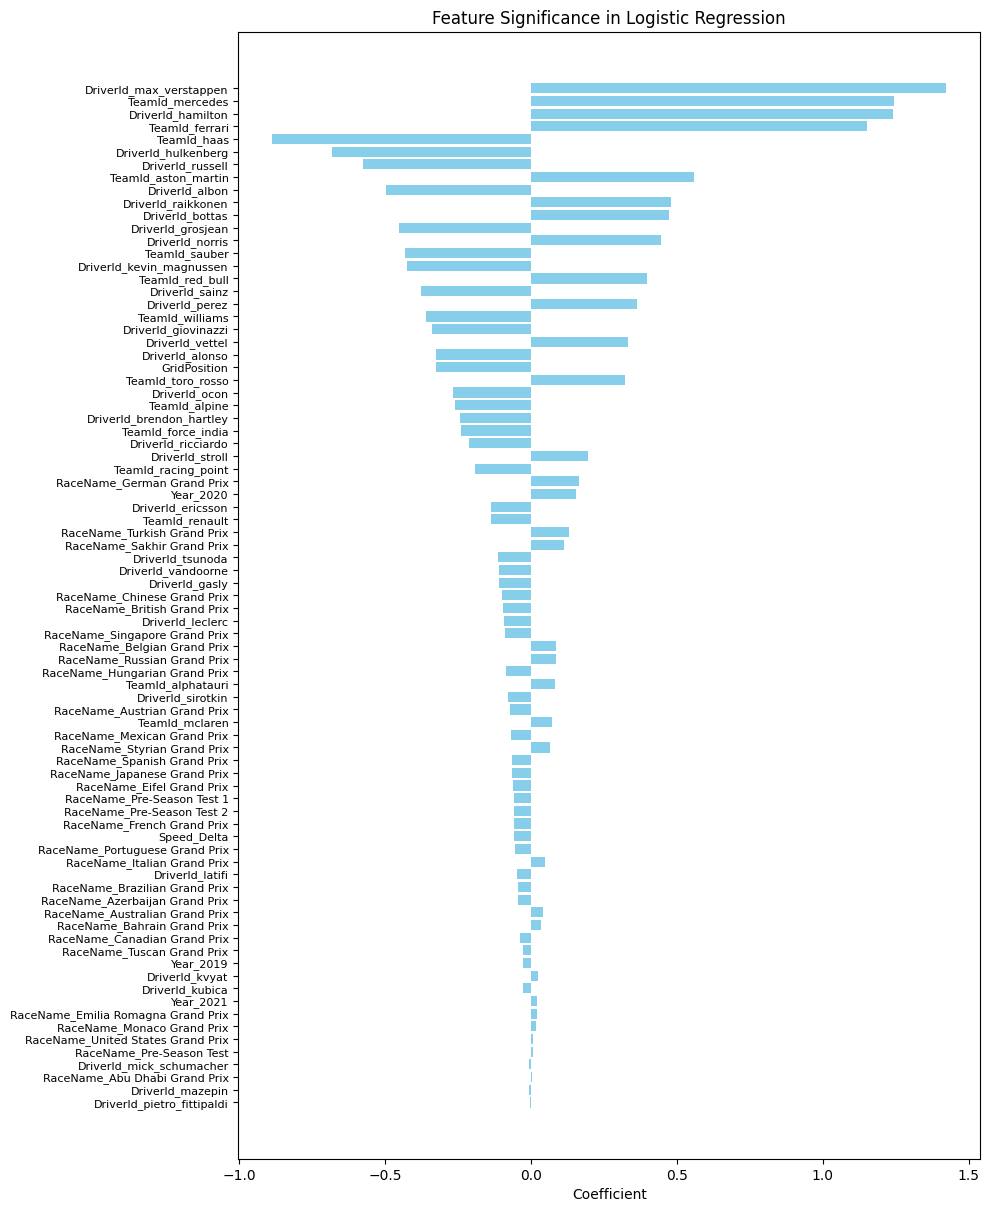

In [25]:
# Get the coefficients and feature names
coefficients = log_reg.coef_[0]
features = X.columns

# Create a DataFrame to store the coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 12))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.title('Feature Significance in Logistic Regression')
plt.gca().invert_yaxis()  # To have the most significant feature at the top
plt.show()

Coefficient for Speed_Predicted: -0.05582637394112494


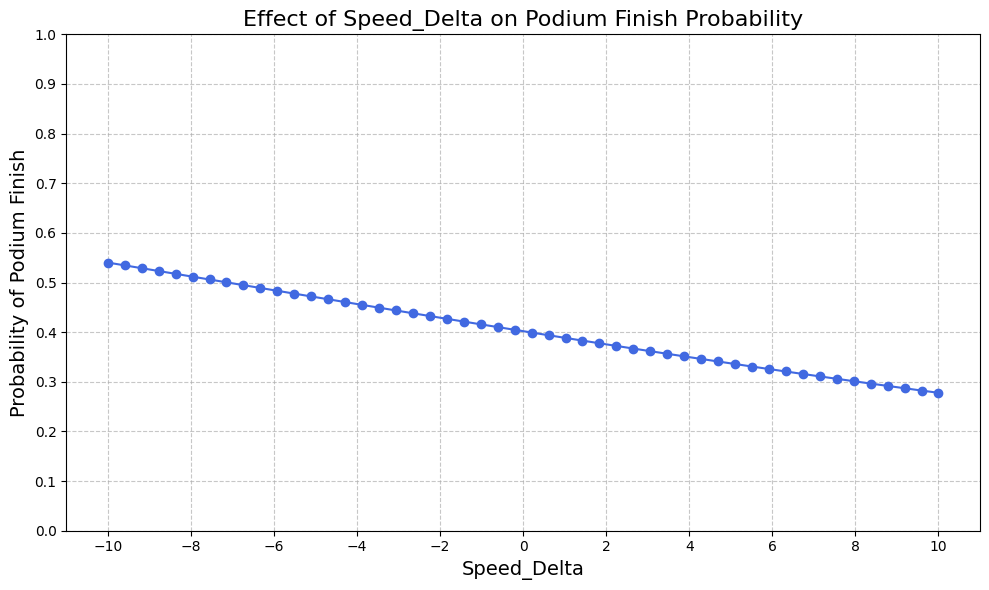

In [32]:
target_variable = 'Speed_Delta'
# target_variable = 'Speed_Predicted'

# Extract the coefficient for Speed_Predicted
speed_predicted_coef = log_reg.coef_[0][X.columns.get_loc(target_variable)]
print(f"Coefficient for Speed_Predicted: {speed_predicted_coef}")

# Visualize the effect of Speed_Predicted on the probability of a podium finish

# Generate a range of target variable values
speed_predicted_values = np.linspace(-10, 10, 50)  # Adjust the range as necessary
baseline_features = np.zeros(X.shape[1])
speed_predicted_probabilities = []

for speed in speed_predicted_values:
    baseline_features[X.columns.get_loc(target_variable)] = speed
    prob = log_reg.predict_proba([baseline_features])[0, 1]
    speed_predicted_probabilities.append(prob)

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(speed_predicted_values, speed_predicted_probabilities, marker='o', linestyle='-', color='royalblue')
plt.title(f'Effect of {target_variable} on Podium Finish Probability', fontsize=16)
plt.xlabel(f'{target_variable}', fontsize=14)
plt.ylabel('Probability of Podium Finish', fontsize=14)

# Adjust x-axis to show a reasonable range
plt.xticks(np.linspace(-10, 10, 11))  # Adjust based on the range of Speed_Predicted
plt.yticks(np.linspace(0, 1, 11))  # Probability range from 0 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 

# Show the plot
plt.show()